In [1]:
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('../src')

from network_tools import create_network, create_encoders
from iris_data_tools import read_iris_data, normalize_iris_data
from training_tools import train_all
from plotting_tools import plot_acc

iris_data_location = '../Data/iris.data'

average steady state t = 24.873333333333356
150


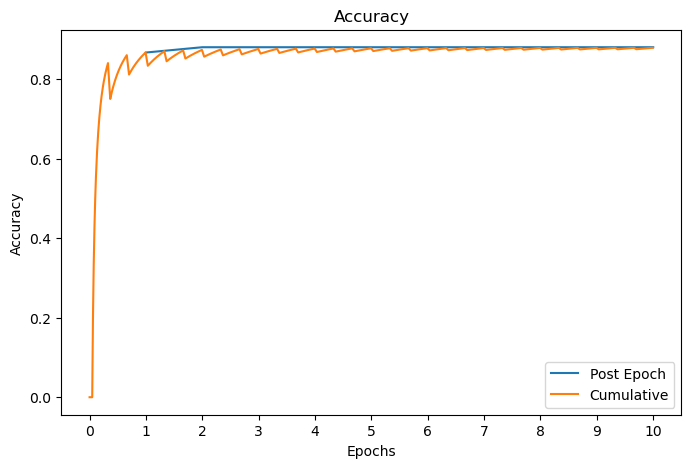

In [2]:
iris_data, labels, classes, attributes = read_iris_data(iris_data_location)
normalized_iris_data = normalize_iris_data(iris_data, attributes)

#  create network and encoders
n_neurons = 16
n_synapses = int(n_neurons * np.random.uniform(low=2, high=3)) # random number from n_neurons * 2 to n_neurons * 3

encoders = create_encoders(attributes)

neurons = create_network(n_neurons, n_synapses)

# create dpe weights
dpe_weights = np.random.rand(n_neurons, len(classes))

n_epochs = 10

E_t, avg_ss, c_acc = train_all(normalized_iris_data, labels, classes, neurons, encoders, dpe_weights, sim_time=100, window_size=10, n_epochs=n_epochs)

print(f'average steady state t = {avg_ss}')

plot_acc(E_t, c_acc)